# Trabalho do Curso Integra School 2021

Alunos: Ewerton Jhonatas Medeiros de Oliveira

Professor: Carlos Artur Guimarães

Problemática: Análise de Dados relacionados ao covid-19 no Rio Grande do Norte.

Fonte de Dados: (https://covid.lais.ufrn.br/), SESAP.


# Importações

In [1]:
#Importações
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2_Scrub

In [2]:
!pip install missingno #instalação da biblioteca missingno
import missingno as msno # importação da biblioteca

In [3]:
#csv evolução por municipios
covid = pd.read_csv("https://raw.githubusercontent.com/Ewerton1910/Python/main/evolucao_municipios.csv", delimiter=';')
#csv obitos por faixa etaria e sexo
faixa_etaria = pd.read_csv("https://raw.githubusercontent.com/Ewerton1910/Python/main/Faixa%20Et%C3%A1ria%20dos%20%C3%93bitos%20por%20Covid19.csv" , delimiter=';')

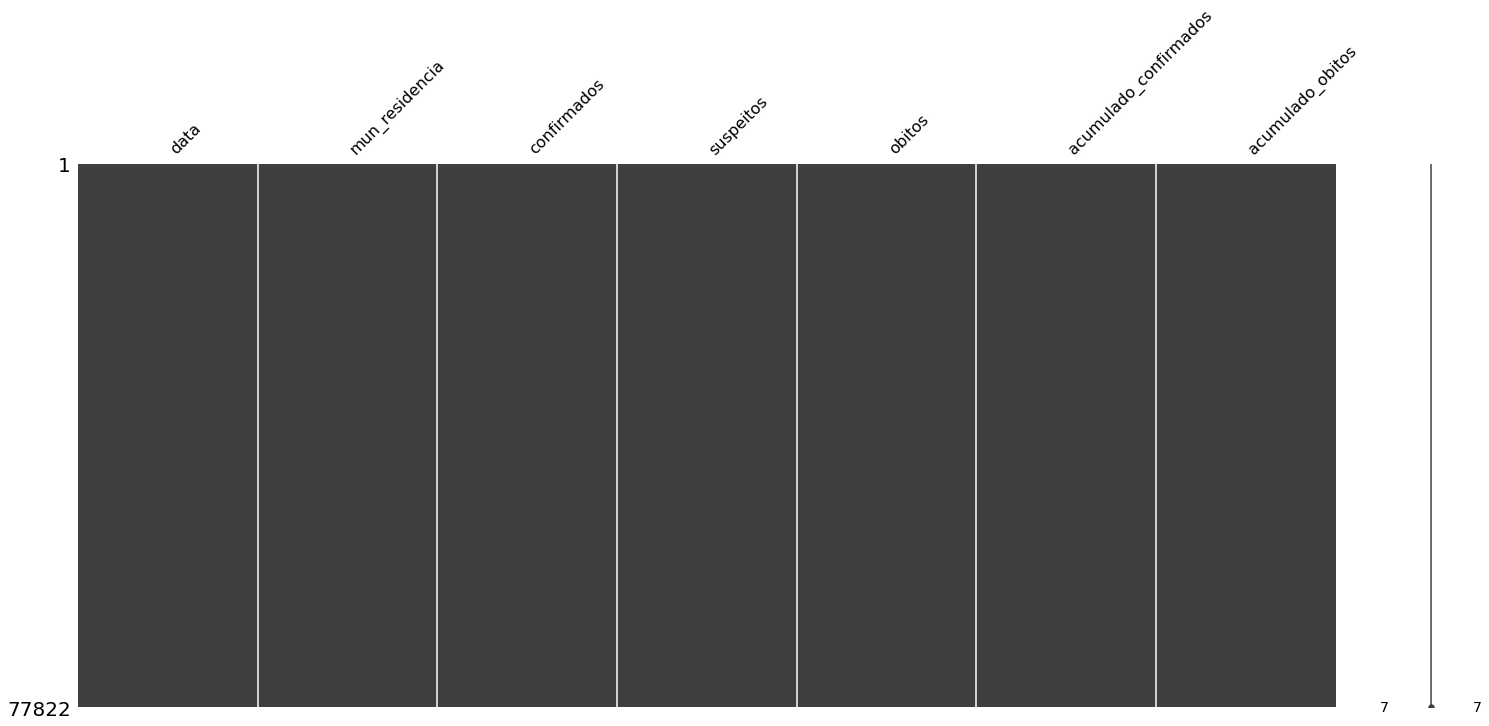

In [4]:
msno.matrix(covid)

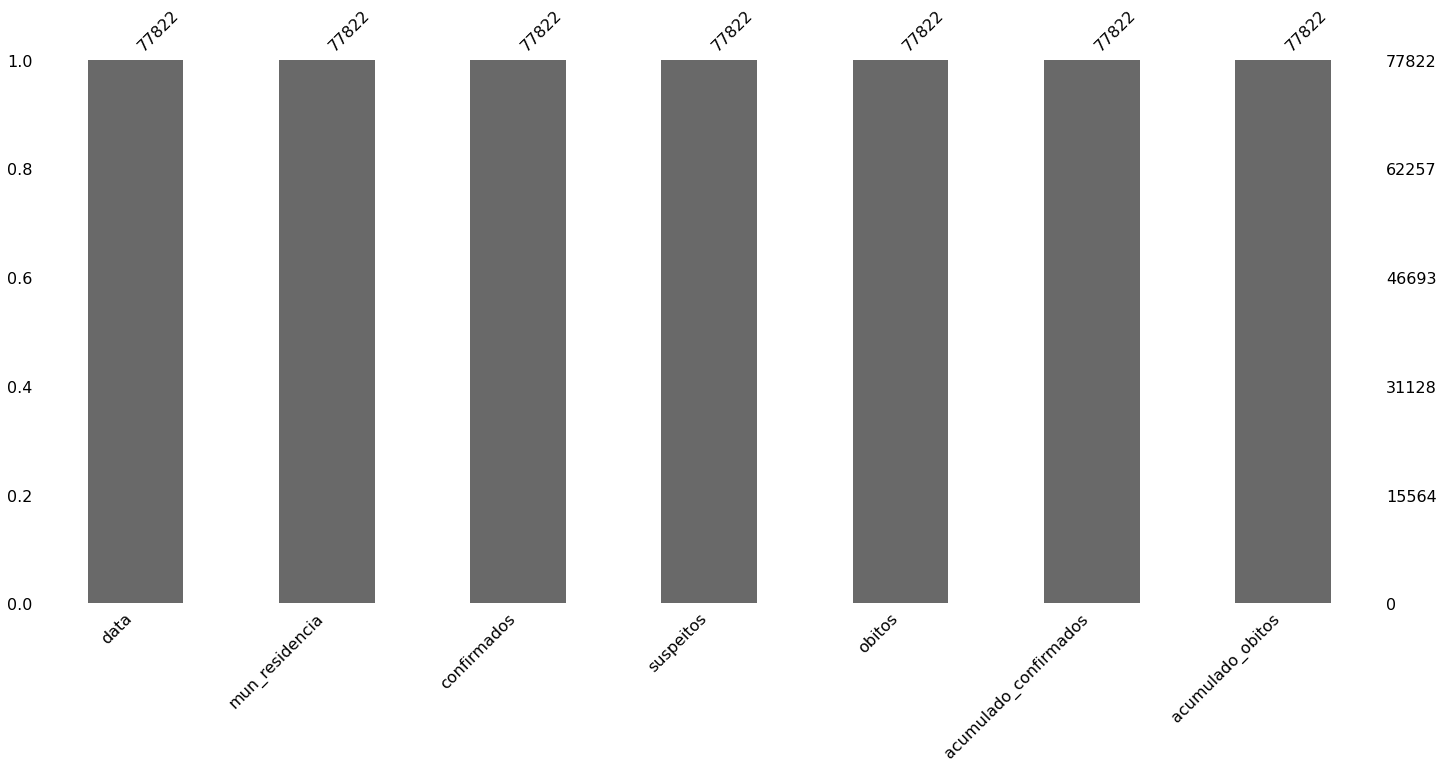

In [5]:
msno.bar(covid)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


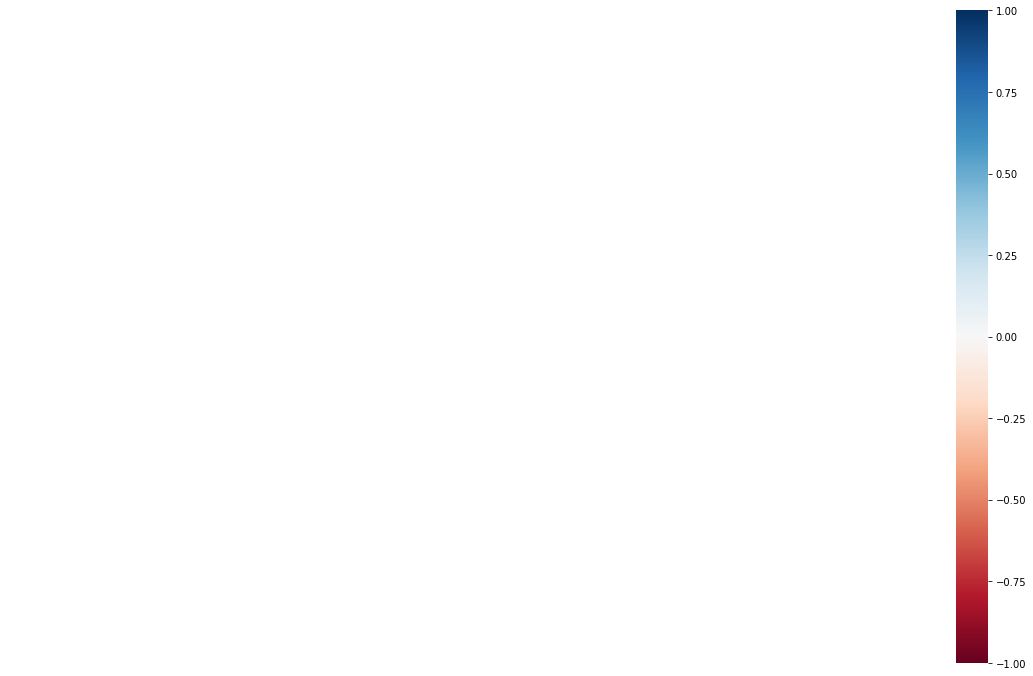

In [6]:
msno.heatmap(covid)

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2837: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


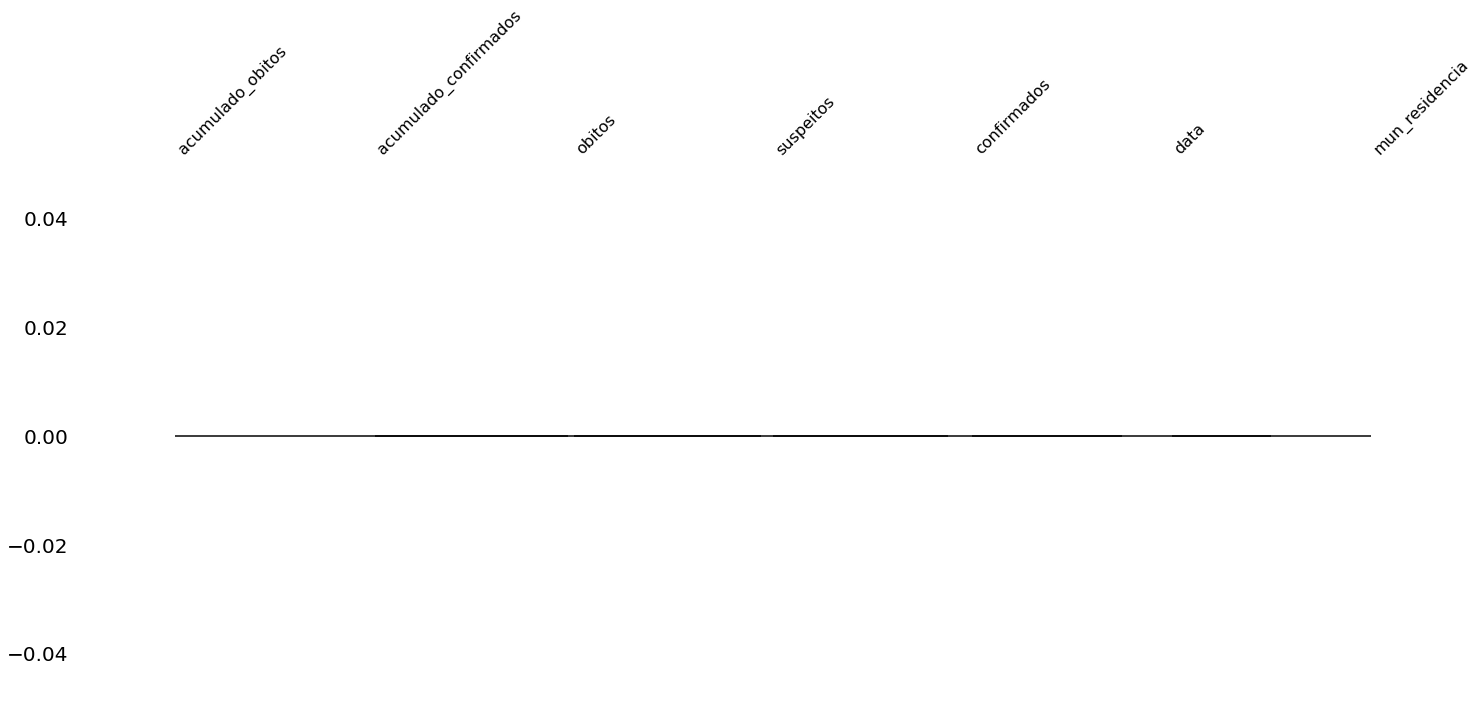

In [7]:
msno.dendrogram(covid)

# 3_Exploração dos Dados

In [8]:
covid.head(10)

,data,mun_residencia,confirmados,suspeitos,obitos,acumulado_confirmados,acumulado_obitos
0,2020-02-26,Acari,0,0,0,0,0
1,2020-02-26,Açu,0,0,0,0,0
2,2020-02-26,Afonso Bezerra,0,0,0,0,0
3,2020-02-26,Água Nova,0,0,0,0,0
4,2020-02-26,Alexandria,0,0,0,0,0
5,2020-02-26,Almino Afonso,0,0,0,0,0
6,2020-02-26,Alto do Rodrigues,0,0,0,0,0
7,2020-02-26,Angicos,0,0,0,0,0
8,2020-02-26,Antônio Martins,0,0,0,0,0
9,2020-02-26,Apodi,0,0,0,0,0


In [9]:
covid.describe()

,confirmados,suspeitos,obitos,acumulado_confirmados,acumulado_obitos
count,77822.000000,77822.000000,77822.000000,77822.000000,77822.000000
mean,3.334507,1.055254,0.077202,591.928247,14.881370
std,15.361680,8.490764,0.617339,3012.052627,96.554756
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,22.000000,0.000000
50%,0.000000,0.000000,0.000000,126.000000,2.000000
75%,2.000000,0.000000,0.000000,343.000000,7.000000
max,564.000000,375.000000,26.000000,65502.000000,2267.000000


In [10]:
#analisando obitos maiores que 3
covid.loc[covid['acumulado_obitos']>3]

,data,mun_residencia,confirmados,suspeitos,obitos,acumulado_confirmados,acumulado_obitos
6933,2020-04-07,Mossoró,3,0,1,149,4
7100,2020-04-08,Mossoró,8,0,2,157,6
7101,2020-04-08,Natal,21,2,1,432,4
7267,2020-04-09,Mossoró,3,0,0,160,6
7268,2020-04-09,Natal,18,0,1,450,5
...,...,...,...,...,...,...,...
77815,2021-06-05,Umarizal,0,0,0,871,15
77816,2021-06-05,Upanema,0,0,0,963,16
77817,2021-06-05,Várzea,0,0,0,303,10
77818,2021-06-05,Venha-Ver,0,0,0,229,5


In [11]:
#selecionando colunas do dataframe
colunasSelecionadas=['data', 'mun_residencia', 'confirmados', 'suspeitos', 'obitos',
       'acumulado_confirmados', 'acumulado_obitos']

In [12]:
#colunas selecionadas atribuidas a um novo dataframe
covid19 = covid.filter(items=colunasSelecionadas)

In [13]:
coluna_mun_residencia = covid19['mun_residencia']
coluna_confirmados = covid19['acumulado_confirmados']
coluna_acumulo_obitos = covid19['acumulado_obitos']
#exibição de cidades selecionadas
coluna_mun_residencia.loc[[7100,7101,16160]]

7100                     Mossoró
7101                       Natal
16160    São Gonçalo do Amarante
Name: mun_residencia, dtype: object

In [14]:
#seleção de cidades especificas
coluna_confirmados.loc[[7100,7101,16160]]


7100     157
7101     432
16160    963
Name: acumulado_confirmados, dtype: int64

In [15]:
#atribuindo dados de cidades especificas a um novo dataframe para manipulação
cidadesSelecionadas = coluna_mun_residencia[[7100,7101,16160]]
confirmadosCidadesSelecionadas= coluna_confirmados[[7100,7101,16160]]
obitodCidadesSelecionadas = coluna_acumulo_obitos[[7100,7101,16160]]

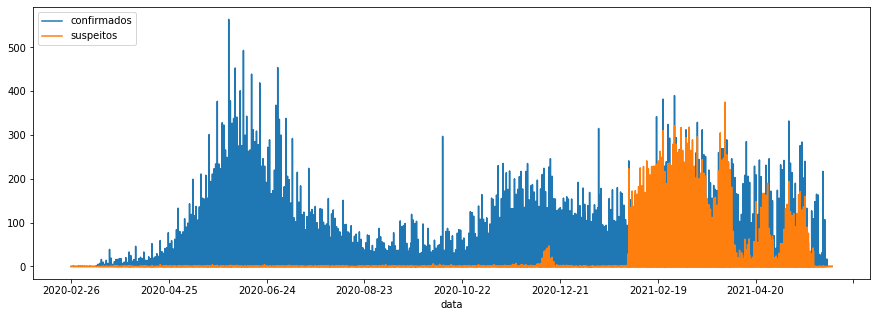

In [43]:
plt.rc('figure', figsize=(15.0, 5.0))
covid19.plot(x='data',y=['confirmados' ,'suspeitos'])
plt.legend(ncol=1,loc='upper left')

Text(0.5, 1.0, 'Casos Confirmados')

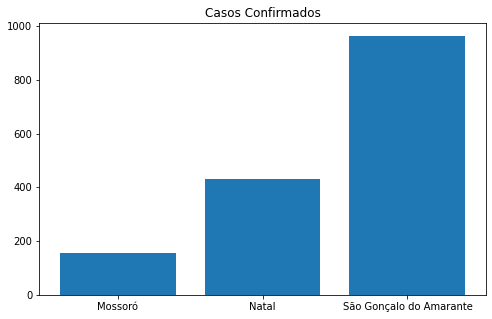

In [17]:
plt.rc('figure', figsize=(8.0, 5.0))
plt.bar(cidadesSelecionadas,confirmadosCidadesSelecionadas)
plt.title("Casos Confirmados")

In [18]:
faixa_etaria.head()

,Grupo de Faixa Etária,Feminino,Masculino
0,00-04,10,5
1,05-09,5,2
2,10-14,0,2
3,15-19,7,4
4,20-24,26,21


In [19]:
faixa_etaria.describe()

,Feminino,Masculino
count,21.000000,21.000000
mean,131.000000,154.857143
std,117.586989,143.686912
min,0.000000,2.000000
25%,24.000000,21.000000
50%,111.000000,129.000000
75%,224.000000,322.000000
max,341.000000,426.000000


In [20]:
#Criando Váriaveis 
grupo_faixa_etaria = faixa_etaria['Grupo de Faixa Etária']
sexo_m = faixa_etaria['Masculino']
sexo_f = faixa_etaria['Feminino']


<BarContainer object of 21 artists>

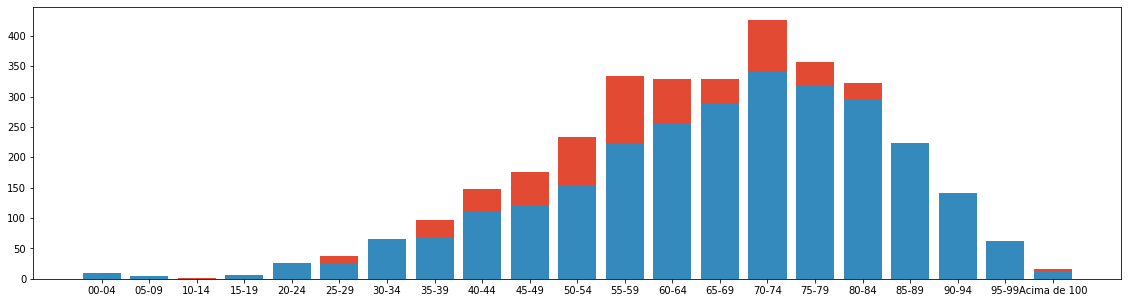

In [21]:
#Faixa etária de óbitos pelo covid(Homens/Mulheres)
 #plt.figure( figsize=(20,3))
plt.rc('figure', figsize=(19.5, 5.0)) 
plt.bar(grupo_faixa_etaria,sexo_m, color='#E24A33')
plt.bar(grupo_faixa_etaria,sexo_f, color='#348ABD')


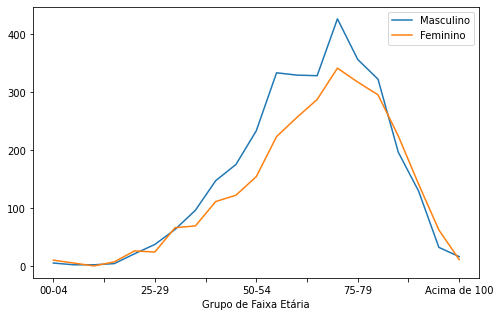

In [22]:
plt.rc('figure', figsize=(8.0, 5.0))
faixa_etaria.plot(x="Grupo de Faixa Etária" , y=["Masculino", "Feminino"])

Text(0.5, 1.0, 'Faixa Etária de Óbitos por idade e Sexo')

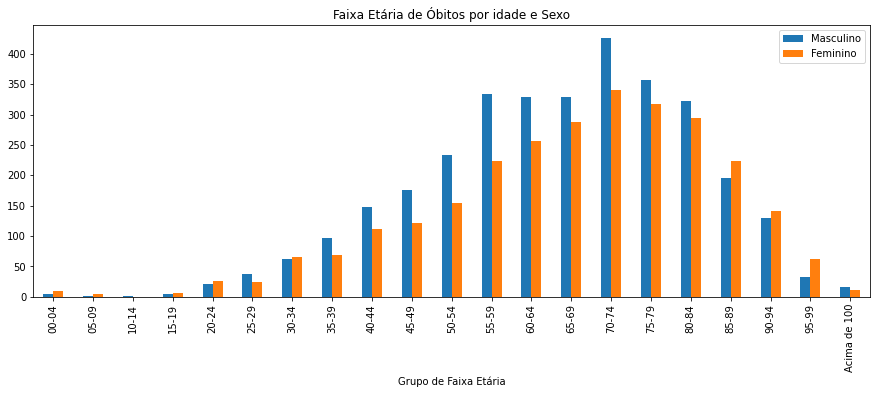

In [23]:
plt.rc('figure', figsize=(15.0, 5.0))
faixa_etaria.plot(x="Grupo de Faixa Etária" , y=["Masculino", "Feminino"], kind="bar")
plt.title("Faixa Etária de Óbitos por idade e Sexo")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff0925ca10>,
      dtype=object)

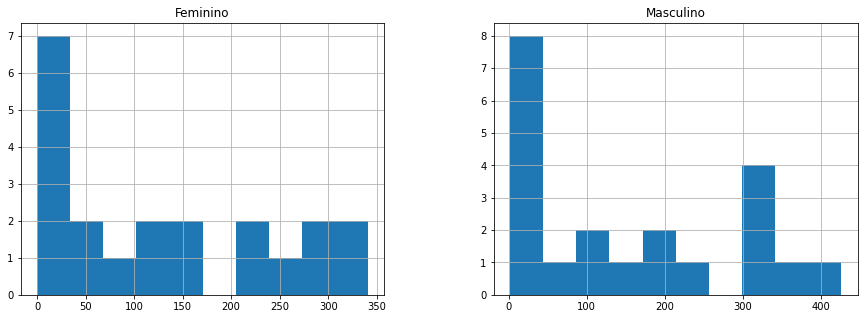

In [24]:
faixa_etaria.hist()


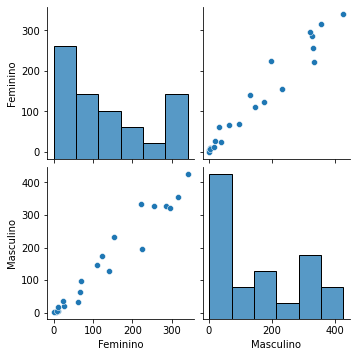

In [40]:
sns.pairplot(faixa_etaria)

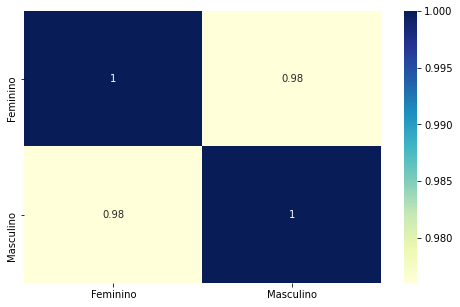

In [38]:
plt.rc('figure', figsize=(8.0, 5.0))
plot = sns.heatmap(faixa_etaria.corr(), cmap='YlGnBu', annot=True)

# Conclusão:
Uma pequena exploração dos dados relacionados ao  covid-19, com o conteúdo explanado pelo professor no Integra School 2021.